<a href="https://colab.research.google.com/github/yu9824/pytorch_book_info/blob/main/notebooks/ch03_first_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3章　初めての機械学習

In [ ]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [ ]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [ ]:
# PyTorch関連ライブラリ
import torch
from torchviz import make_dot

In [ ]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

## 3.4 勾配降下法の実装

In [ ]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
    return 6* u - v + 7
def Lv(u, v):
    return 6* v - u - 7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [ ]:
# 勾配降下法のシミュレーション
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

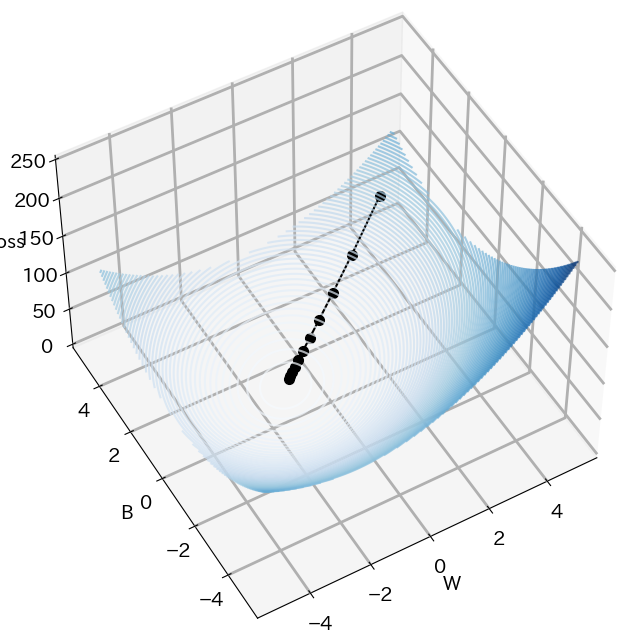

In [ ]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

## 3.5 データ前処理
5人の人の身長と体重のデータを使う。  
1次関数で身長から体重を予測する場合、最適な直線を求めることが目的。

In [ ]:
# サンプルデータの宣言
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [ ]:
# 機械学習モデルで扱うため、身長だけを抜き出した変数xと
# 体重だけを抜き出した変数yをセットする

x = sampleData1[:,0]
y = sampleData1[:,1]

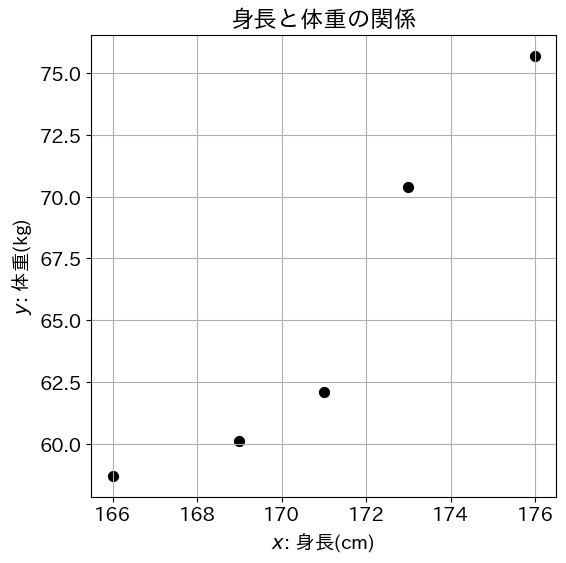

In [ ]:
# 散布図表示で状況の確認

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$: 身長(cm) ')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()

### 座標系の変換
機械学習モデルでは、データは0に近い値を持つことが望ましい。  
そこで、x, y ともに平均値が0になるように平行移動し、新しい座標系をX, Yとする。

In [ ]:
X = x - x.mean()
Y = y - y.mean()

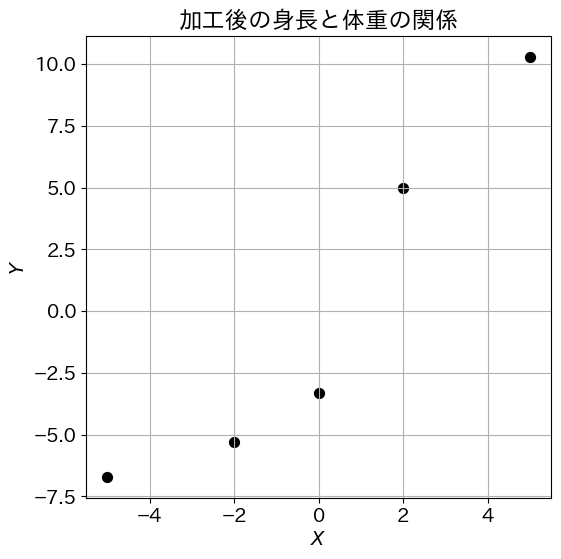

In [ ]:
# 散布図表示で結果の確認

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('加工後の身長と体重の関係')
plt.show()

## 3.6 予測計算

In [ ]:
# XとYをテンソル変数化する

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [ ]:
# 結果確認

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [ ]:
# 重み変数の定義
# WとBは勾配計算をするので、requires_grad=Trueとする

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [ ]:
# 予測関数は一次関数

def pred(X):
    return W * X + B

In [ ]:
# 予測値の計算

Yp =  pred(X)

In [ ]:
# 結果標示

print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


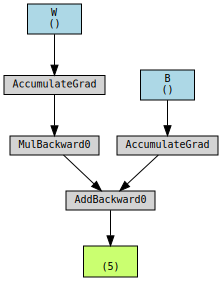

In [ ]:
# 予測値の計算グラフ可視化

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

## 3.7 損失計算

In [ ]:
# 損失関数は誤差二乗平均

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [ ]:
# 損失計算

loss = mse(Yp, Y)

In [ ]:
# 結果標示

print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


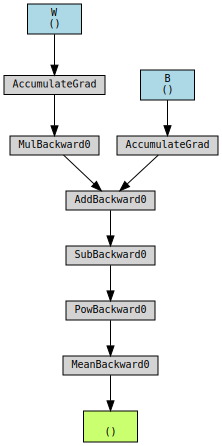

In [ ]:
# 損失の計算グラフ可視化

params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

## 3.8 勾配計算

In [ ]:
# 勾配計算

loss.backward()

In [ ]:
# 勾配値確認

print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


## 3.9 パラメータ修正

In [ ]:
# 学習率の定義

lr = 0.001

In [ ]:
#  勾配を元にパラメータ修正

W -= lr * W.grad
B -= lr * B.grad

RuntimeError: ignored

WとBは一度計算済みなので、この状態で値の更新ができない  
次の書き方にする必要がある

In [ ]:
# 勾配を元にパラメータ修正
# with torch.no_grad() を付ける必要がある

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    # 計算済みの勾配値をリセットする
    W.grad.zero_()
    B.grad.zero_()

In [ ]:
# パラメータと勾配値の確認

print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


元の値はどちらも1.0だったので、Wは微少量増加、Bは微少量減少したことがわかる。  
この計算を繰り返すことで、最適なWとBを求めるのが勾配降下法となる。

## 3.10 繰り返し計算

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# 記録用配列初期化
history = np.zeros((0, 2))

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)

    # 損失計算
    loss = mse(Yp, Y)

    # 勾配計算
    loss.backward()

    with torch.no_grad():
        # パラメータ修正
        W -= lr * W.grad
        B -= lr * B.grad

        # 勾配値の初期化
        W.grad.zero_()
        B.grad.zero_()

    # 損失の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')


epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

## 3.11 結果確認

In [ ]:
# パラメータの最終値
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}')
print(f'最終状態: 損失:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


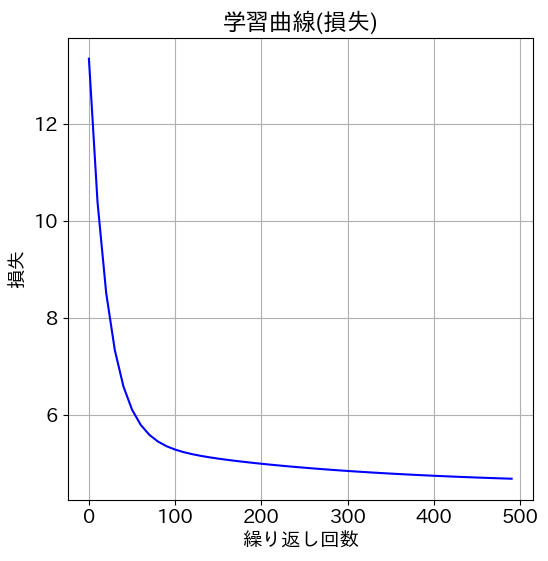

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

### 散布図に回帰直線を重ね書きする

In [ ]:
# xの範囲を求める(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 対応するyの予測値を求める
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


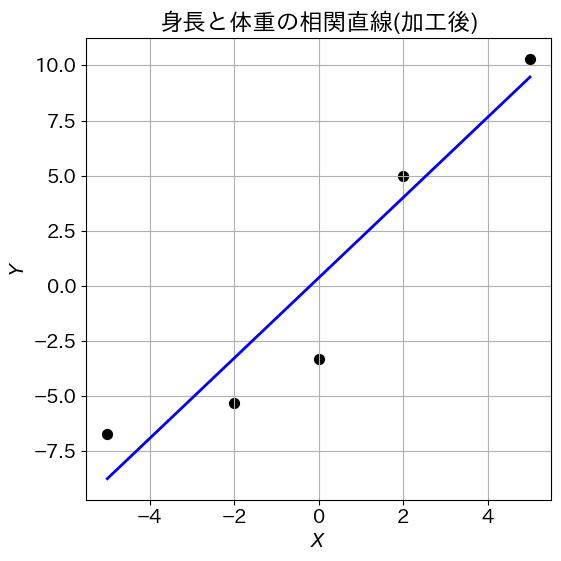

In [ ]:
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工後)')
plt.show()

### 加工前データへの回帰直線描画

In [ ]:
# y座標値とx座標値の計算

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

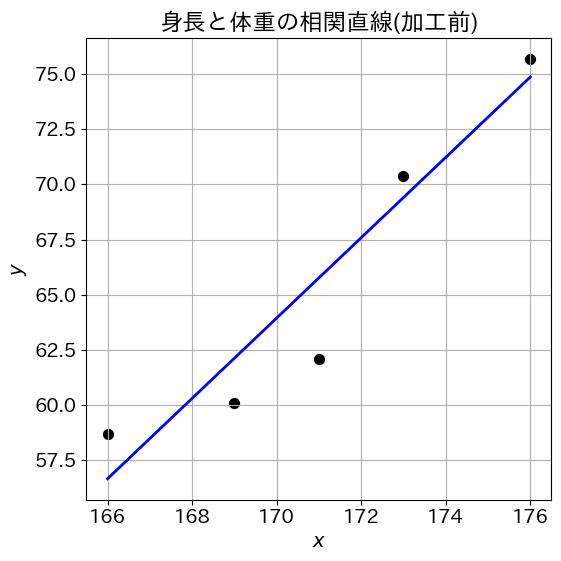

In [ ]:
# グラフ描画

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工前)')
plt.show()

## 3.12 最適化関数とstep関数の利用

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizerとしてSGD(確率的勾配降下法)を指定する
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# 記録用配列初期化
history = np.zeros((0, 2))

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)

    # 損失計算
    loss = mse(Yp, Y)

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    #勾配値初期化
    optimizer.zero_grad()

    # 損失値の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [ ]:
# パラメータの最終値
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}')
print(f'最終状態: 損失:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


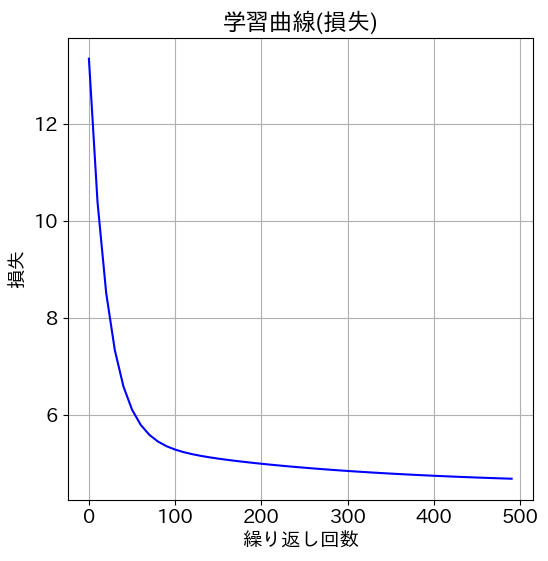

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

3.7の結果と見比べるとまったく同じであることがわかる。  
つまり、step関数でやっていることは、次のコードと同じ。

```py3

 with torch.no_grad():
        # パラメータ修正 (フレームワークを使う場合はstep関数)
        W -= lr * W.grad
        B -= lr * B.grad
```

### 最適化関数のチューニング

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizerとしてSGD(確率的勾配降下法)を指定する
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# 記録用配列初期化
history2 = np.zeros((0, 2))

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)

    # 損失計算
    loss = mse(Yp, Y)

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    #勾配値初期化
    optimizer.zero_grad()

    # 損失値の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')


epoch = 0  loss = 13.3520
epoch = 10  loss = 5.7585
epoch = 20  loss = 5.9541
epoch = 30  loss = 5.0276
epoch = 40  loss = 4.8578
epoch = 50  loss = 4.7052
epoch = 60  loss = 4.6327
epoch = 70  loss = 4.5940
epoch = 80  loss = 4.5698
epoch = 90  loss = 4.5574
epoch = 100  loss = 4.5495
epoch = 110  loss = 4.5452
epoch = 120  loss = 4.5426
epoch = 130  loss = 4.5411
epoch = 140  loss = 4.5403
epoch = 150  loss = 4.5398
epoch = 160  loss = 4.5395
epoch = 170  loss = 4.5393
epoch = 180  loss = 4.5392
epoch = 190  loss = 4.5391
epoch = 200  loss = 4.5391
epoch = 210  loss = 4.5391
epoch = 220  loss = 4.5391
epoch = 230  loss = 4.5390
epoch = 240  loss = 4.5390
epoch = 250  loss = 4.5390
epoch = 260  loss = 4.5390
epoch = 270  loss = 4.5390
epoch = 280  loss = 4.5390
epoch = 290  loss = 4.5390
epoch = 300  loss = 4.5390
epoch = 310  loss = 4.5390
epoch = 320  loss = 4.5390
epoch = 330  loss = 4.5390
epoch = 340  loss = 4.5390
epoch = 350  loss = 4.5390
epoch = 360  loss = 4.5390
epoch = 370

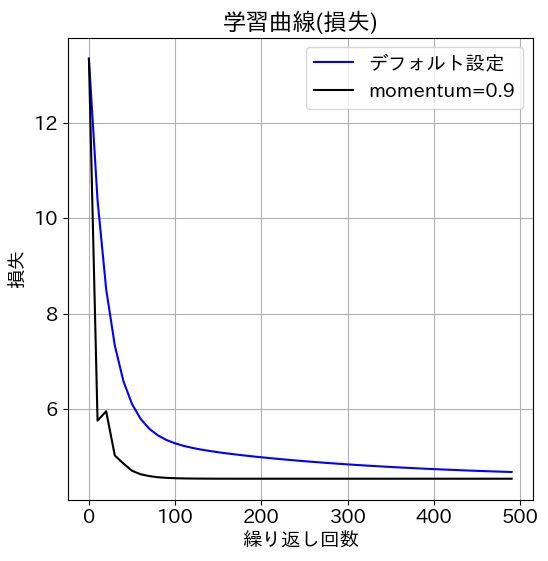

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='デフォルト設定')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線(損失)')
plt.show()

## コラム　局所最適解

In [ ]:
def f(x):
    return x * (x+1) * (x+2) * (x-2)

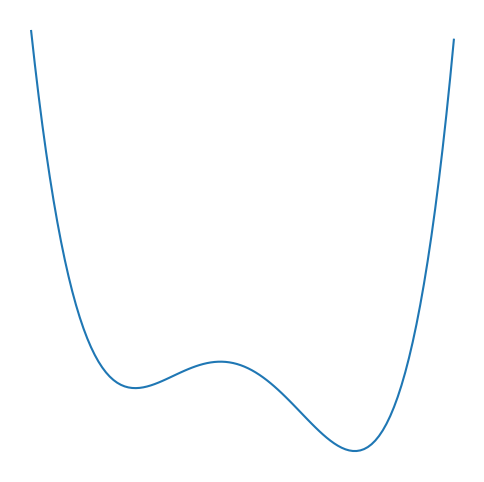

In [ ]:
x = np.arange(-3, 2.7, 0.05)
y = f(x)

plt.plot(x, y)
plt.axis('off')
plt.show()